 # CNN 모델 개선을 위한 단계적 접근 #

In [1]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt

# 데이터 경로 설정
train_dir = "/mnt/e/aiffel/dlthon/dataset/distortion_free_data/Train_Test_Valid/"

# 이미지 크기 및 배치 크기 설정
img_size = (224, 224)
batch_size = 32

# 데이터셋 생성
datasets = {}
for folder in os.listdir(train_dir):
    folder_path = os.path.join(train_dir, folder)
    if os.path.isdir(folder_path):
        dataset_name = f"{folder.lower()}_ds"
        datasets[dataset_name] = tf.keras.utils.image_dataset_from_directory(
            folder_path,
            image_size=img_size,
            batch_size=batch_size,
            label_mode='categorical'
        )
        print(f"## Dataset: {dataset_name}")

2025-01-21 18:47:07.591143: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-01-21 18:47:07.669421: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-21 18:47:08.827739: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-01-21 18:47:09.982878: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1737452830.952303    1353 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1737452831.22

Found 74 files belonging to 6 classes.


2025-01-21 18:47:54.783201: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


## Dataset: test_ds
Found 235 files belonging to 6 classes.
## Dataset: train_ds
Found 74 files belonging to 6 classes.
## Dataset: valid_ds


 ## 1. 단순 컨브넷(코드8-1) ##

In [70]:
# 코드 8-1 간단한 컨브넷
inputs = tf.keras.Input(shape=(224, 224, 3))  
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(len(datasets['train_ds'].class_names), activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [71]:
# 모델 저장 경로 설정
model_filename = "keras_model/ksa_distortion_free_data_8_1.keras"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filename,
    save_best_only=True,
    monitor='val_loss',
)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model_history = model.fit(
    datasets['train_ds'],
    epochs=30,
    validation_data=datasets['valid_ds'],
    callbacks=[checkpoint_callback]
)

Epoch 1/30


8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 394ms/step - accuracy: 0.1672 - loss: 764.7900 - val_accuracy: 0.2297 - val_loss: 9.9322
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 392ms/step - accuracy: 0.3375 - loss: 5.6161 - val_accuracy: 0.2162 - val_loss: 1.8457
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 431ms/step - accuracy: 0.6021 - loss: 1.1599 - val_accuracy: 0.2162 - val_loss: 2.2011
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 375ms/step - accuracy: 0.7684 - loss: 0.6885 - val_accuracy: 0.2568 - val_loss: 2.4567
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 368ms/step - accuracy: 0.8914 - loss: 0.4268 - val_accuracy: 0.2703 - val_loss: 3.1500
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 369ms/step - accuracy: 0.9038 - loss: 0.3146 - val_accuracy: 0.3108 - val_loss: 3.1103
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 376ms/step - accuracy: 0.9621 - loss: 0.1855 - val_accuracy: 0.2568 - val_loss: 4.3600
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 383ms/step - accuracy: 0.9878 - loss: 0.0872 - val_accuracy: 0.2297 - val_loss: 5.6692
E

In [72]:
model.summary()

Model: "functional_49"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_13 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_47 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_39 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_48 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_40 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_49 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_13 (Flatten)            │ (None, 346112)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 6)              │     2,076,678 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,509,780 (24.83 MB)

 Trainable params: 2,169,926 (8.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,339,854 (16.56 MB)

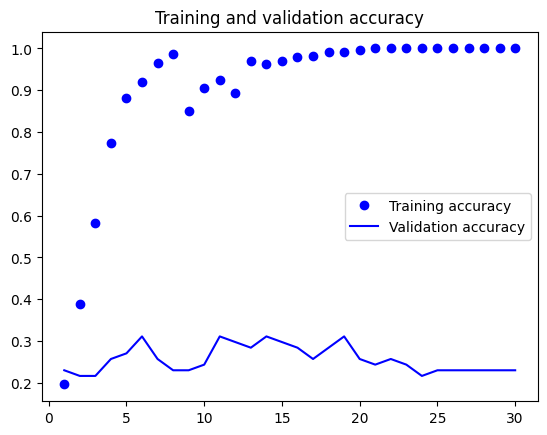

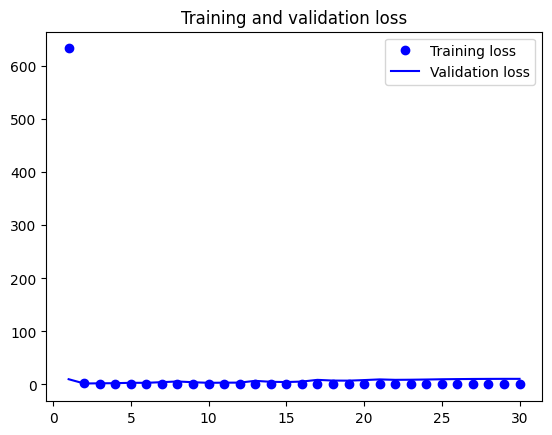

In [73]:
# 학습 결과 시각화
accuracy = model_history.history["accuracy"]
val_accuracy = model_history.history["val_accuracy"]
loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [49]:
# 저장된 모델 로드 후 평가
test_loss, test_acc = model.evaluate(datasets['test_ds'])
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")
best_model = tf.keras.models.load_model(model_filename)
test_loss, test_acc = best_model.evaluate(datasets['test_ds']) 
print(f"Best_model Accuracy: {test_acc * 100:.2f}%")
print(f"Best_model Loss: {test_loss * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 98ms/step - accuracy: 0.1727 - loss: 9.4994 
Test Accuracy: 18.92%
Test Loss: 829.45%
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 104ms/step - accuracy: 0.2825 - loss: 2.3792
Best_model Accuracy: 28.38%
Best_model Loss: 221.30%


 ## 2. 컨볼루션 층 추가(코드8-7) ##

In [50]:
# 코드 8-7 소규모 컨브넷
inputs = tf.keras.Input(shape=(224, 224, 3))  
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(inputs)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(len(datasets['train_ds'].class_names), activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [51]:
# 모델 저장 경로 설정
model_filename = "keras_model/ksa_distortion_free_data_8_7_1.keras"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filename,
    save_best_only=True,
    monitor='val_loss',
)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model_history = model.fit(
    datasets['train_ds'],
    epochs=30,
    validation_data=datasets['valid_ds'],
    callbacks=[checkpoint_callback]
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 782ms/step - accuracy: 0.1693 - loss: 47.0177 - val_accuracy: 0.3243 - val_loss: 1.7456
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 780ms/step - accuracy: 0.3238 - loss: 1.7564 - val_accuracy: 0.3919 - val_loss: 1.4707
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 773ms/step - accuracy: 0.3861 - loss: 1.4853 - val_accuracy: 0.3784 - val_loss: 1.7677
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 828ms/step - accuracy: 0.4873 - loss: 1.2447 - val_accuracy: 0.4189 - val_loss: 1.3702
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 818ms/step - accuracy: 0.6162 - loss: 1.0433 - val_accuracy: 0.4054 - val_loss: 1.5982
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 829ms/step - accuracy: 0.5303 - loss: 1.1578 - val_accuracy: 0.2838 - val_loss: 2.1942
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 866ms/step - accuracy: 0.6516 - loss: 0.9441 - val_accuracy: 0.4054 - val_loss: 1.6979
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.7632 - loss: 0.7332 - val_accuracy: 0.4189 - val_loss: 2

In [52]:
model.summary()

Model: "functional_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_9 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_32 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_26 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_33 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_27 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_34 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_28 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_35 (Conv2D)              │ (None, 10, 10, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 6)              │       153,606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,396,308 (12.96 MB)

 Trainable params: 1,132,102 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,264,206 (8.64 MB)

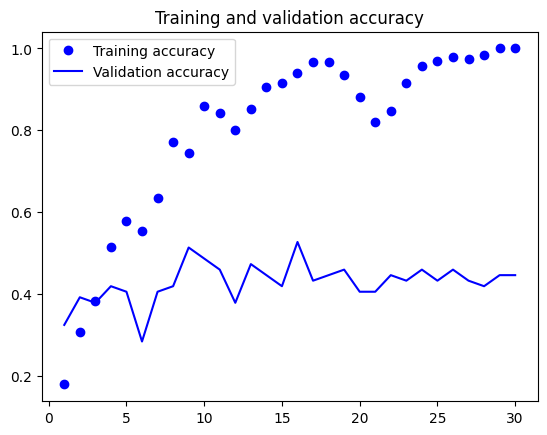

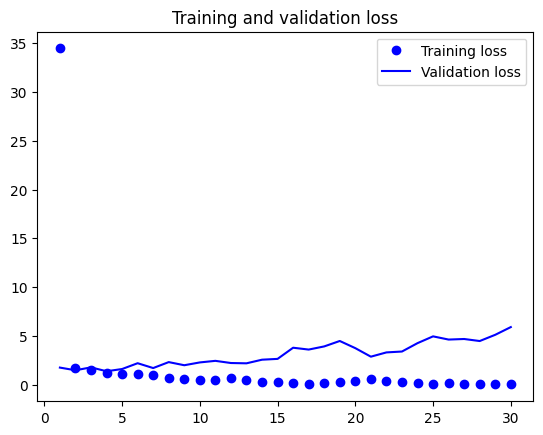

In [53]:
# 학습 결과 시각화
accuracy = model_history.history["accuracy"]
val_accuracy = model_history.history["val_accuracy"]
loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [54]:
# 저장된 모델 로드 후 평가
test_loss, test_acc = model.evaluate(datasets['test_ds'])
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")
best_model = tf.keras.models.load_model(model_filename)
test_loss, test_acc = best_model.evaluate(datasets['test_ds']) 
print(f"Best_model Accuracy: {test_acc * 100:.2f}%")
print(f"Best_model Loss: {test_loss * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 136ms/step - accuracy: 0.3777 - loss: 5.1228
Test Accuracy: 36.49%
Test Loss: 582.52%
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 172ms/step - accuracy: 0.4058 - loss: 1.3793
Best_model Accuracy: 40.54%
Best_model Loss: 139.39%


 ## 3. 리스케일링 추가 ##

In [55]:
# 코드 8-7 소규모 컨브넷
inputs = tf.keras.Input(shape=(224, 224, 3))  
x = tf.keras.layers.Rescaling(1./255)(inputs)    
x = tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=128, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.MaxPooling2D(pool_size=2)(x)
x = tf.keras.layers.Conv2D(filters=256, kernel_size=3, activation="relu")(x)
x = tf.keras.layers.Flatten()(x)
outputs = tf.keras.layers.Dense(len(datasets['train_ds'].class_names), activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [56]:
# 모델 저장 경로 설정
model_filename = "keras_model/ksa_distortion_free_data_8_7.keras"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filename,
    save_best_only=True,
    monitor='val_loss',
)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model_history = model.fit(
    datasets['train_ds'],
    epochs=30,
    validation_data=datasets['valid_ds'],
    callbacks=[checkpoint_callback]
)

Epoch 1/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 711ms/step - accuracy: 0.1234 - loss: 1.8806 - val_accuracy: 0.2297 - val_loss: 1.7663
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 658ms/step - accuracy: 0.3054 - loss: 1.7303 - val_accuracy: 0.2973 - val_loss: 1.6475
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 928ms/step - accuracy: 0.3008 - loss: 1.6001 - val_accuracy: 0.2838 - val_loss: 1.5780
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 669ms/step - accuracy: 0.3941 - loss: 1.4034 - val_accuracy: 0.3784 - val_loss: 1.4987
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 648ms/step - accuracy: 0.4282 - loss: 1.3323 - val_accuracy: 0.3919 - val_loss: 1.5663
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 693ms/step - accuracy: 0.5418 - loss: 1.1592 - val_accuracy: 0.3649 - val_loss: 1.6342
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 702ms/step - accuracy: 0.5547 - loss: 1.0580 - val_accuracy: 0.4054 - val_loss: 1.5020
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 735ms/step - accuracy: 0.6350 - loss: 1.0260 - val_accuracy: 0.4730 - val_loss:

In [57]:
model.summary()

Model: "functional_34"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_10 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling_1 (Rescaling)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_36 (Conv2D)              │ (None, 222, 222, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_29 (MaxPooling2D) │ (None, 111, 111, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_37 (Conv2D)              │ (None, 109, 109, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_30 (MaxPooling2D) │ (None, 54, 54, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 52, 52, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_31 (MaxPooling2D) │ (None, 26, 26, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_39 (Conv2D)              │ (None, 24, 24, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_32 (MaxPooling2D) │ (None, 12, 12, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_40 (Conv2D)              │ (None, 10, 10, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_10 (Flatten)            │ (None, 25600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 6)              │       153,606 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,396,308 (12.96 MB)

 Trainable params: 1,132,102 (4.32 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2,264,206 (8.64 MB)

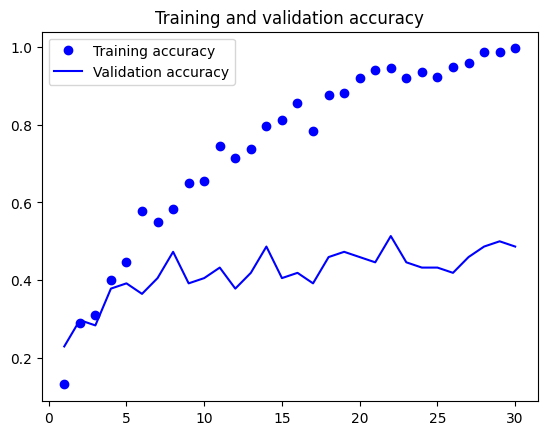

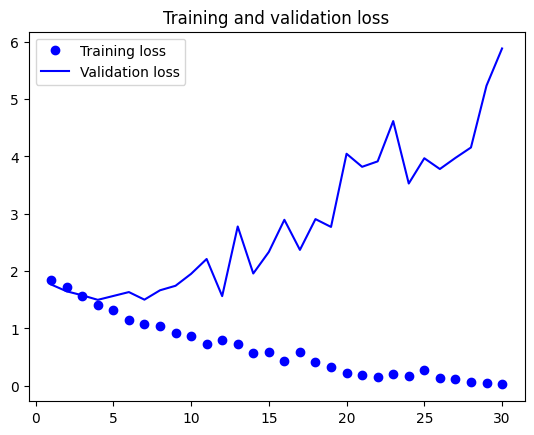

In [58]:
# 학습 결과 시각화
accuracy = model_history.history["accuracy"]
val_accuracy = model_history.history["val_accuracy"]
loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [59]:
# 저장된 모델 로드 후 평가
test_loss, test_acc = model.evaluate(datasets['test_ds'])
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")
best_model = tf.keras.models.load_model(model_filename)
test_loss, test_acc = best_model.evaluate(datasets['test_ds']) 
print(f"Best_model Accuracy: {test_acc * 100:.2f}%")
print(f"Best_model Loss: {test_loss * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 201ms/step - accuracy: 0.4016 - loss: 5.8155
Test Accuracy: 45.95%
Test Loss: 493.15%
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 188ms/step - accuracy: 0.3465 - loss: 1.4289
Best_model Accuracy: 36.49%
Best_model Loss: 140.63%


 ## 4. 소규모 컨브넷: 배치 정규화 및 패딩 적용 ##

In [60]:
inputs = tf.keras.Input(shape=(224, 224, 3))  
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(inputs)
x = tf.keras.layers.LayerNormalization()(x)
x = tf.keras.layers.MaxPooling2D((4,4), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.LayerNormalization()(x)
x = tf.keras.layers.MaxPooling2D((4,4), padding='same')(x)
x = tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same')(x)
x = tf.keras.layers.LayerNormalization()(x)
x = tf.keras.layers.MaxPooling2D((4,4), padding='same')(x)
x = tf.keras.layers.Flatten()(x)
x = tf.keras.layers.Dense(128, activation='relu')(x)
outputs = tf.keras.layers.Dense(len(datasets['train_ds'].class_names), activation='softmax')(x)
model = tf.keras.Model(inputs=inputs, outputs=outputs)

In [61]:
# 모델 저장 경로 설정
model_filename = "keras_model/ksa_distortion_free_data.keras"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filename,
    save_best_only=True,
    monitor='val_loss',
)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model_history = model.fit(
    datasets['train_ds'],
    epochs=30,
    validation_data=datasets['valid_ds'],
    callbacks=[checkpoint_callback]
)

Epoch 1/30


8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 571ms/step - accuracy: 0.1540 - loss: 2.5856 - val_accuracy: 0.1757 - val_loss: 1.8957
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 558ms/step - accuracy: 0.3057 - loss: 1.6529 - val_accuracy: 0.2297 - val_loss: 1.8621
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 573ms/step - accuracy: 0.3171 - loss: 1.6370 - val_accuracy: 0.2027 - val_loss: 1.8017
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 7s 866ms/step - accuracy: 0.4200 - loss: 1.4762 - val_accuracy: 0.2297 - val_loss: 1.8495
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 584ms/step - accuracy: 0.4735 - loss: 1.4236 - val_accuracy: 0.2162 - val_loss: 1.8984
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 603ms/step - accuracy: 0.5047 - loss: 1.3479 - val_accuracy: 0.3243 - val_loss: 1.7119
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 599ms/step - accuracy: 0.6168 - loss: 1.1746 - val_accuracy: 0.3919 - val_loss: 1.6701
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 560ms/step - accuracy: 0.6813 - loss: 0.9493 - val_accuracy: 0.3784 - val_loss: 1.6683
Epo

In [62]:
model.summary()

Model: "functional_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_11 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_41 (Conv2D)              │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_9           │ (None, 224, 224, 32)   │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_33 (MaxPooling2D) │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_42 (Conv2D)              │ (None, 56, 56, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_10          │ (None, 56, 56, 32)     │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_34 (MaxPooling2D) │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_43 (Conv2D)              │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_11          │ (None, 14, 14, 32)     │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_35 (MaxPooling2D) │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_11 (Flatten)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,068 (1008.08 KB)

 Trainable params: 86,022 (336.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 172,046 (672.06 KB)

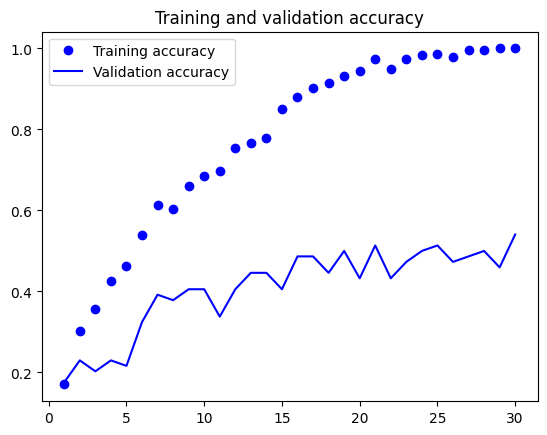

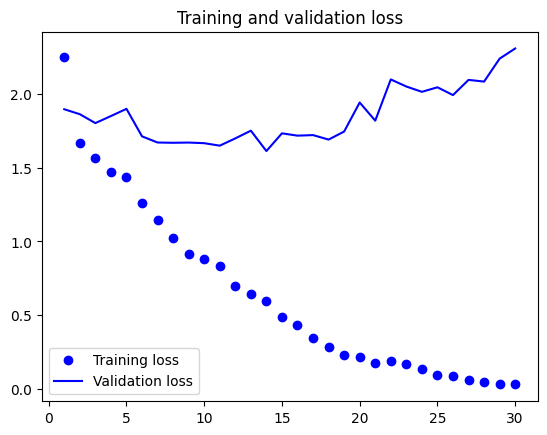

In [63]:
# 학습 결과 시각화
accuracy = model_history.history["accuracy"]
val_accuracy = model_history.history["val_accuracy"]
loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [64]:
# 저장된 모델 로드 후 평가
test_loss, test_acc = model.evaluate(datasets['test_ds'])
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")
best_model = tf.keras.models.load_model(model_filename)
test_loss, test_acc = best_model.evaluate(datasets['test_ds']) 
print(f"Best_model Accuracy: {test_acc * 100:.2f}%")
print(f"Best_model Loss: {test_loss * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step - accuracy: 0.5273 - loss: 2.2787
Test Accuracy: 50.00%
Test Loss: 227.90%
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.4410 - loss: 1.5544
Best_model Accuracy: 40.54%
Best_model Loss: 169.14%


 ## 5. 드롭아웃 추가 ##

In [3]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3), padding='same'),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.MaxPooling2D((4,4), padding='same'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.MaxPooling2D((4,4), padding='same'),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.LayerNormalization(),
    tf.keras.layers.MaxPooling2D((4,4), padding='same'),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(len(datasets['train_ds'].class_names), activation='softmax')
])

In [4]:
# 모델 저장 경로 설정
model_filename = "keras_model/ksa_distortion_free_data_dropout.keras"
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=model_filename,
    save_best_only=True,
    monitor='val_loss',
)

# 모델 컴파일
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 모델 학습
model_history = model.fit(
    datasets['train_ds'],
    epochs=30,
    validation_data=datasets['valid_ds'],
    callbacks=[checkpoint_callback]
)

Epoch 1/30


8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 789ms/step - accuracy: 0.1748 - loss: 2.4895 - val_accuracy: 0.1486 - val_loss: 1.8216
Epoch 2/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 457ms/step - accuracy: 0.3634 - loss: 1.6853 - val_accuracy: 0.2432 - val_loss: 1.7499
Epoch 3/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 435ms/step - accuracy: 0.3054 - loss: 1.7347 - val_accuracy: 0.2703 - val_loss: 1.7708
Epoch 4/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 443ms/step - accuracy: 0.3199 - loss: 1.5759 - val_accuracy: 0.2973 - val_loss: 1.7658
Epoch 5/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 488ms/step - accuracy: 0.3158 - loss: 1.5664 - val_accuracy: 0.3108 - val_loss: 1.6621
Epoch 6/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 452ms/step - accuracy: 0.3910 - loss: 1.4748 - val_accuracy: 0.3514 - val_loss: 1.5975
Epoch 7/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 447ms/step - accuracy: 0.4102 - loss: 1.4177 - val_accuracy: 0.3243 - val_loss: 1.6108
Epoch 8/30
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 497ms/step - accuracy: 0.4138 - loss: 1.3921 - val_accuracy: 0.2973 - val_loss: 1.6399
Ep

In [5]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_3           │ (None, 224, 224, 32)   │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 56, 56, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 56, 56, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_4           │ (None, 56, 56, 32)     │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ layer_normalization_5           │ (None, 14, 14, 32)     │            64 │
│ (LayerNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 4, 4, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 6)              │           774 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 258,068 (1008.08 KB)

 Trainable params: 86,022 (336.02 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 172,046 (672.06 KB)

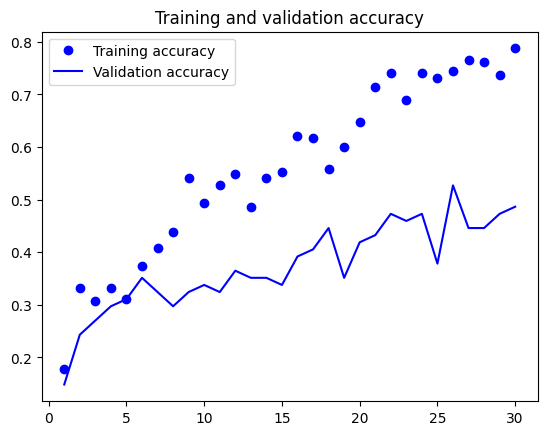

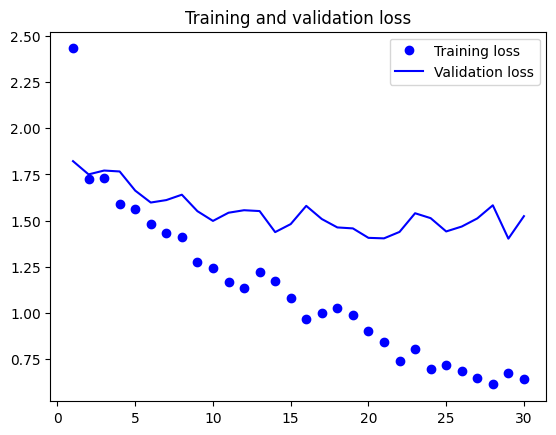

In [6]:
# 학습 결과 시각화
accuracy = model_history.history["accuracy"]
val_accuracy = model_history.history["val_accuracy"]
loss = model_history.history["loss"]
val_loss = model_history.history["val_loss"]
epochs = range(1, len(accuracy) + 1)
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title("Training and validation accuracy")
plt.legend()
plt.figure()
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.legend()
plt.show()

In [7]:
# 저장된 모델 로드 후 평가
test_loss, test_acc = model.evaluate(datasets['test_ds'])
print(f"Test Accuracy: {test_acc * 100:.2f}%")
print(f"Test Loss: {test_loss * 100:.2f}%")
best_model = tf.keras.models.load_model(model_filename)
test_loss, test_acc = best_model.evaluate(datasets['test_ds']) 
print(f"Best_model Accuracy: {test_acc * 100:.2f}%")
print(f"Best_model Loss: {test_loss * 100:.2f}%")

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step - accuracy: 0.5252 - loss: 1.4993 
Test Accuracy: 52.70%
Test Loss: 154.71%
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 83ms/step - accuracy: 0.4485 - loss: 1.5055 
Best_model Accuracy: 45.95%
Best_model Loss: 146.96%
